<a href="https://colab.research.google.com/github/vir097/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

* **What is Airbnb?**

* ***Airbnb was founded in 2008 as a platform enabling locals to list their homes for short term rental and travelers to have a lodging option alternative to hotels.*** 
* ***Airbnb is the largest provider of rooms available to travelers.Along with homes for rent, Airbnb.com allows its users to search through “Experiences”, which include pre-arranged multi destination trips, “Restaurants,”.***

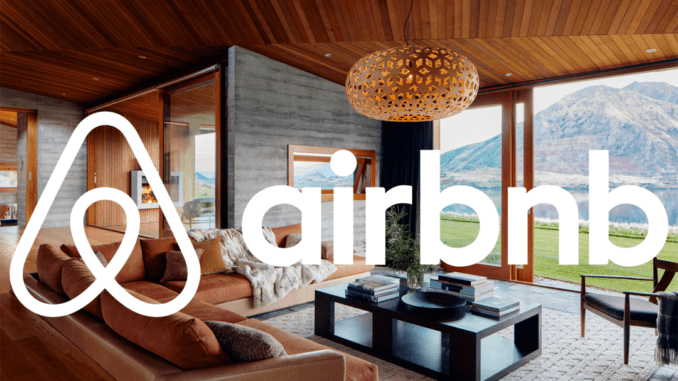

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
airbnb_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AirBnB Bookings Analysis/Airbnb NYC 2019.csv")

## **Basic Inspection**

In [4]:
# Top 5 rows of the dataset
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Bottom 5 rows of the dataset
airbnb_df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
# Get the shape of the dataset
# Finding the number of rows and columns in the given dataset
airbnb_df.shape 

(48895, 16)

* **After loading the dataset in and from the head of AIRBNB_NYC_CSV_2019 dataset, we can see a number of things. This dataset has $16$ coloums and $48896$ rows and provide a very rich amount of information for deep data exploration we can do this dataset.** 

In [7]:
# Columns in the given dataset
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
# Desciption of the give dataset
airbnb_df.describe([.25, .50, .75, .95, .98, .99])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
95%,3.525910e+07,2.417646e+08,40.825643,-73.865771,355.000000,30.000000,114.000000,4.640000,15.000000,359.000000
98%,3.598575e+07,2.623600e+08,40.851312,-73.810278,550.000000,30.000000,172.000000,6.000000,91.000000,365.000000
99%,3.623888e+07,2.677118e+08,40.864661,-73.776920,799.000000,45.000000,214.000000,7.195800,232.000000,365.000000


* **From the above Description we get to know that there are some outliers in the dataset.**
* **Outlires present in columns:**
       price
       minimum_nights
       number_of_reviews
       last_review
       reviews_per_month

In [9]:
# Check the type of data present in DataFrame
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

* **lets find the number of NaN values in Dataset**

In [10]:
# lets find the number of NaN values in each column
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# First and foremost, I'd like to determine which columns contain NaN values.

NaN_value_columns = [i for i in airbnb_df.columns if airbnb_df[i].isnull().any()]
print(f'NaN value columns are: {NaN_value_columns}')

NaN value columns are: ['name', 'host_name', 'last_review', 'reviews_per_month']


* **There are four columns in the dataset which contain NaN values.**
* **NaN value columns:**
      name
      host_name 
      last_review 
      reviews_per_month

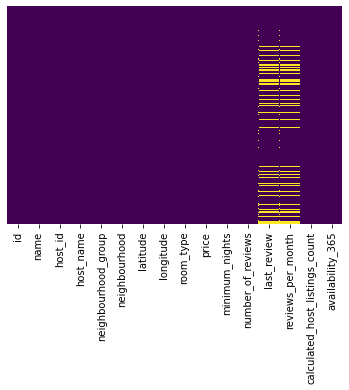

In [13]:
# Visualization of null values 
sns.heatmap(airbnb_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

*  **The *last reviews* and *reviews per month* both columns contains 10052 NaN values.** 

**Handling the NaN values**

In [14]:
airbnb_df.last_review

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [15]:
airbnb_df.last_review.fillna(value=0, inplace=True)

In [16]:
''' The NaN values can be imputed by 
the aggregate (mean or median) of the remaining values 
in the reviews per month column. '''

' The NaN values can be imputed by \nthe aggregate (mean or median) of the remaining values \nin the reviews per month column. '

In [17]:
mean_ = round(airbnb_df[~airbnb_df['reviews_per_month'].isnull()]['reviews_per_month'].mean(),1)

median_ = airbnb_df[~airbnb_df['reviews_per_month'].isnull()]['reviews_per_month'].median()

[mean_, median_]

[1.4, 0.72]

In [18]:
airbnb_df['reviews_per_month']

0        0.21
1        0.38
2         NaN
3        4.64
4        0.10
         ... 
48890     NaN
48891     NaN
48892     NaN
48893     NaN
48894     NaN
Name: reviews_per_month, Length: 48895, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


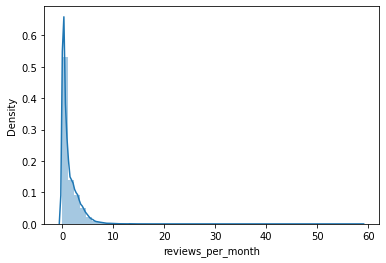

In [19]:
# Distplot
sns.distplot(airbnb_df['reviews_per_month'])

* As we have seen that there are some outliers are present in the reviews per month column which affect our mean because Mean are highly biased to the outliers.
* Hence we will impute the NaN values in the **reviews_per_month** column with its median. 

In [20]:
# Handilng NaN values from Review per month column
airbnb_df['reviews_per_month'].fillna(value= mean_ , inplace=True)

In [21]:
# Handilng NaN values from Name and host_name column
airbnb_df['name'].fillna(value ='No name', inplace=True)
airbnb_df['host_name'].fillna(value ='No name', inplace=True)

In [22]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

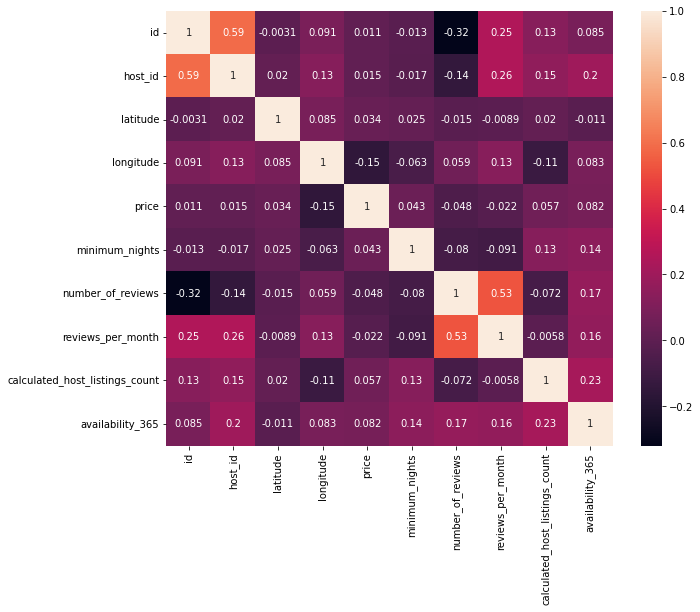

In [23]:
# Get the pairwise correlation of all columns in the dataframe.
corrMatrix = airbnb_df.corr()

# Get a Visual Representation of the Correlation Matrix using Seaborn and Matplotlib.
plt.figure(figsize =(10,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

## **Exploratary Data Analysis**

In [24]:
# our next task is to get unique value of some specifice columns to know about their different types.

# Get unique value of room type to know about different types of room listed on Airbnb platform.
# code
Different_type_of_rooms = airbnb_df['room_type'].unique()
print("Different type of rooms listed on Airbnb platform:", Different_type_of_rooms)

Different type of rooms listed on Airbnb platform: ['Private room' 'Entire home/apt' 'Shared room']


* **As we can see that there are three type of rooms listed on airbnb:**
      Private room
      Entire home/apt
      Shared room

In [25]:
# let's find out count of each type of rooms offered
room_count = airbnb_df['room_type'].value_counts()
print(room_count) 

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

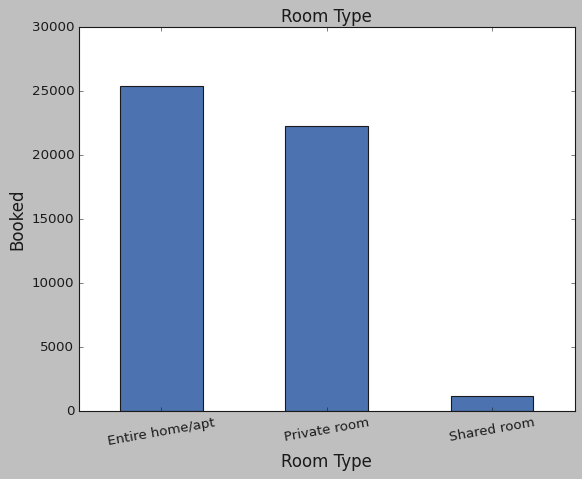

In [26]:
# Visualization of rooms type listed on airbnb platform through Bar graph
# Bar Graph
plt.rcParams["figure.figsize"] = (8,5)
sns.set_theme('poster')
sns.set_style('whitegrid')
plt.style.use('classic')
room_count.plot(kind='bar')
plt.xlabel('Room Type',fontsize=15)
plt.ylabel('Booked',fontsize=15)
plt.title('Room Type',fontsize=15)
plt.xticks(rotation=10)

* **We can see that the $Entire$ $Home/Apt$ has the highest preference of people, followed by the $Private$ $Room$, and the least preferred is $Shared$ $Room$.**

In [27]:
# Examine unique value of neighbourhood group(boroughs)
airbnb_df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


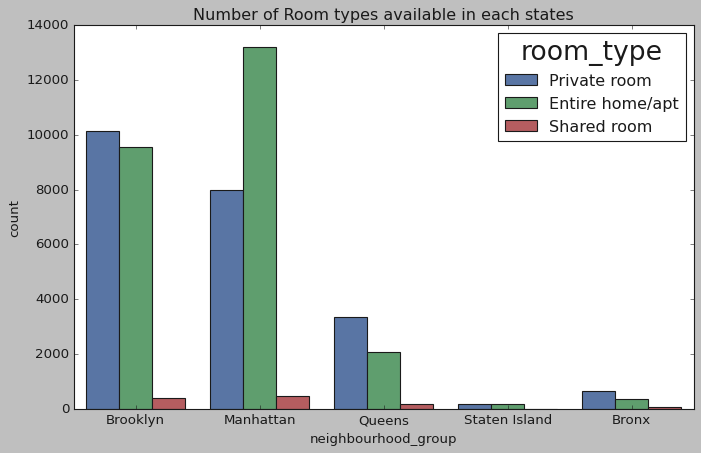

In [28]:
# Number of Room types available in each states
# Countplot
sns.set_theme('poster')
sns.set_style('whitegrid')
plt.style.use('classic')
plt.figure(figsize=(10,6))
sns.countplot(airbnb_df['neighbourhood_group'],hue=airbnb_df['room_type'])
plt.title('Number of Room types available in each states')
plt.show()

* **Most of the rooms are listed in $Brooklyn$ and $Manhattan$ location.**
* **$Manhattan$ has most number of entire apartment and shared accomodation.**
* **$Brooklyn$ has most number of private rooms.**

In [29]:
# Examine unique value of neighbourhood.
airbnb_df['neighbourhood'].unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [30]:
# Get count of unique neighbourhood
len(airbnb_df['neighbourhood'].unique())

221

* **Now, we know that there are $221$ areas have the Airbnb listing**.

In [53]:
# Performing Groupby operation to get list of nieghbourhood w.r.t. their neighbourhood group
neighbourhood_df =airbnb_df[['neighbourhood_group','neighbourhood']].groupby(['neighbourhood_group', 'neighbourhood'],as_index=False).first()

In [86]:
neighbourhood_df

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill
...,...,...
216,Staten Island,Tottenville
217,Staten Island,West Brighton
218,Staten Island,Westerleigh
219,Staten Island,Willowbrook


In [83]:
# List of Bronx neighborhoods
Bronx_list = neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Bronx']
Bronx_list.head()

,neighbourhood_group,neighbourhood
0,Bronx,Allerton
1,Bronx,Baychester
2,Bronx,Belmont
3,Bronx,Bronxdale
4,Bronx,Castle Hill


In [84]:
print("Total neighborhoods of Bronx:", len(Bronx_list))

Total neighborhoods of Bronx: 48


In [81]:
# List of Manhattan neighborhoods
Manhattan_list = neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Manhattan']
Manhattan_list.head()

,neighbourhood_group,neighbourhood
95,Manhattan,Battery Park City
96,Manhattan,Chelsea
97,Manhattan,Chinatown
98,Manhattan,Civic Center
99,Manhattan,East Harlem


In [82]:
print("Total neighborhoods of Manhattan:", len(Manhattan_list))

Total neighborhoods of Manhattan: 32


In [78]:
# List of Queens neighborhoods
Queens_list = neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Queens']
Queens_list.head()

,neighbourhood_group,neighbourhood
127,Queens,Arverne
128,Queens,Astoria
129,Queens,Bay Terrace
130,Queens,Bayside
131,Queens,Bayswater


In [80]:
print("Total neighborhoods of Queens:", len(Queens_list))

Total neighborhoods of Queens: 51


In [79]:
# List of Brooklyn neighborhoods
Brooklyn_list=neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Brooklyn']
Brooklyn_list.head()

,neighbourhood_group,neighbourhood
48,Brooklyn,Bath Beach
49,Brooklyn,Bay Ridge
50,Brooklyn,Bedford-Stuyvesant
51,Brooklyn,Bensonhurst
52,Brooklyn,Bergen Beach


In [76]:
print("Total neighborhoods of Brooklyn:", len(Brooklyn_list))

Total neighborhoods of Brooklyn: 47


In [70]:
# List of Staten Island neighborhoods
staten_island_list =neighbourhood_df[neighbourhood_df['neighbourhood_group']== 'Staten Island']
staten_island_list.head()

,neighbourhood_group,neighbourhood
178,Staten Island,Arden Heights
179,Staten Island,Arrochar
180,Staten Island,"Bay Terrace, Staten Island"
181,Staten Island,Bull's Head
182,Staten Island,Castleton Corners


In [71]:
print("Total neighborhoods of Staten Island:", len(staten_island_list))

Total neighborhoods of Staten Island: 43


In [85]:
# count of neighborhoods w.r.t their neighbourhood group
neighbourhood_df.neighbourhood_group.value_counts()

Queens           51
Bronx            48
Brooklyn         47
Staten Island    43
Manhattan        32
Name: neighbourhood_group, dtype: int64

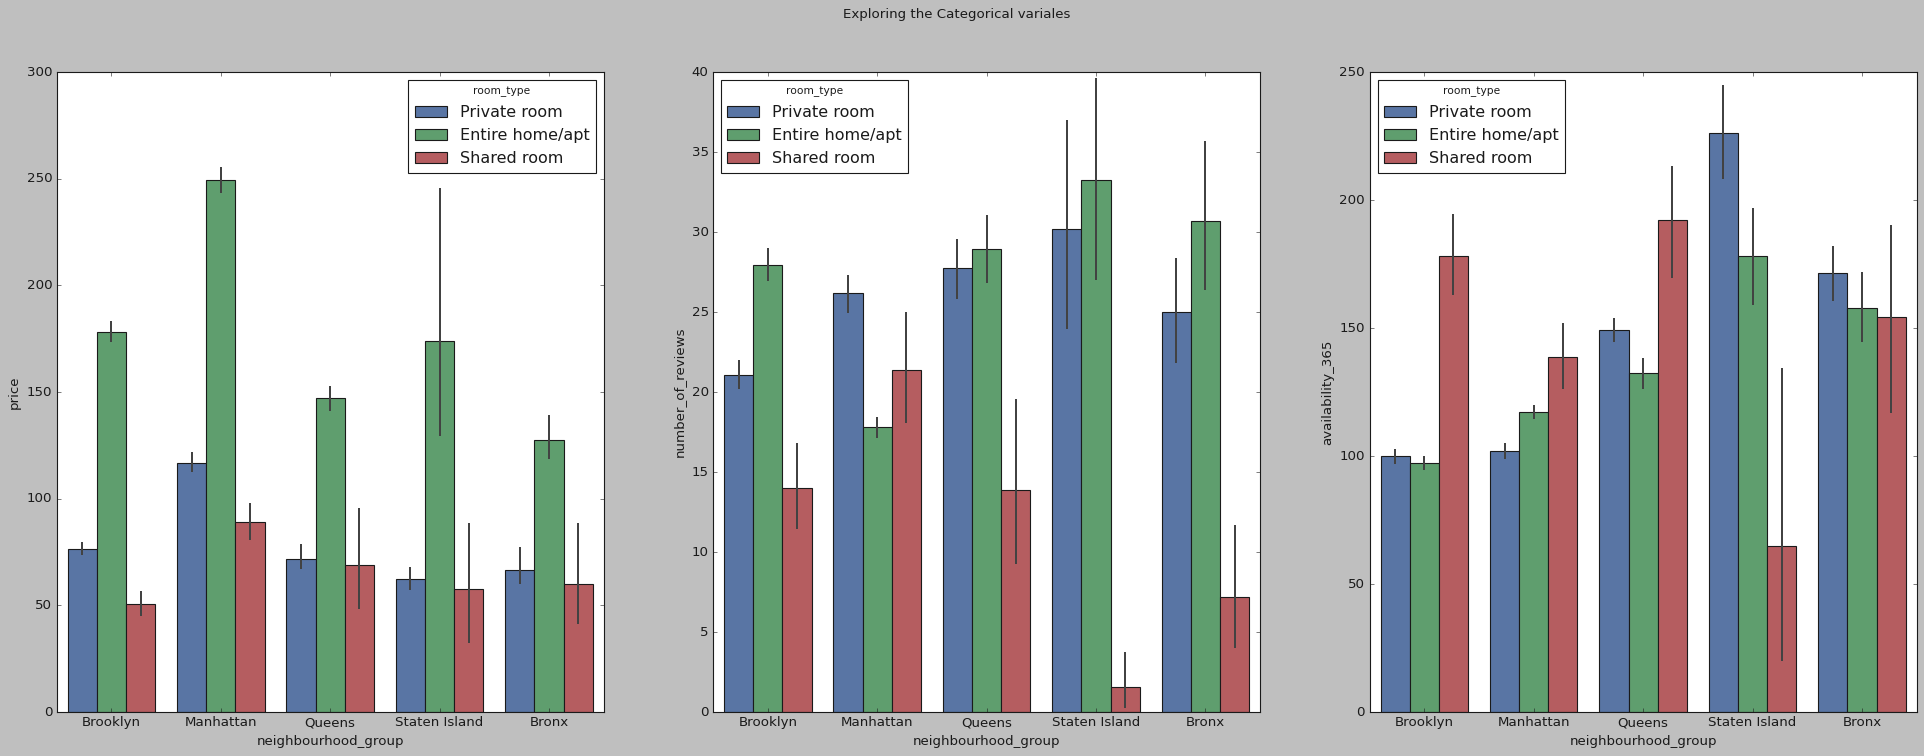

In [124]:
list_ = ['price','number_of_reviews','availability_365']
fig,ax = plt.subplots(1,3,figsize=(30,10))
fig.suptitle("Exploring the Categorical variales")
val=0
for var in list_:
  if val<=2:
    sns.barplot(x=airbnb_df['neighbourhood_group'],y=airbnb_df[var],hue=airbnb_df['room_type'],ax=ax[val])
    val+=1
fig.show()  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


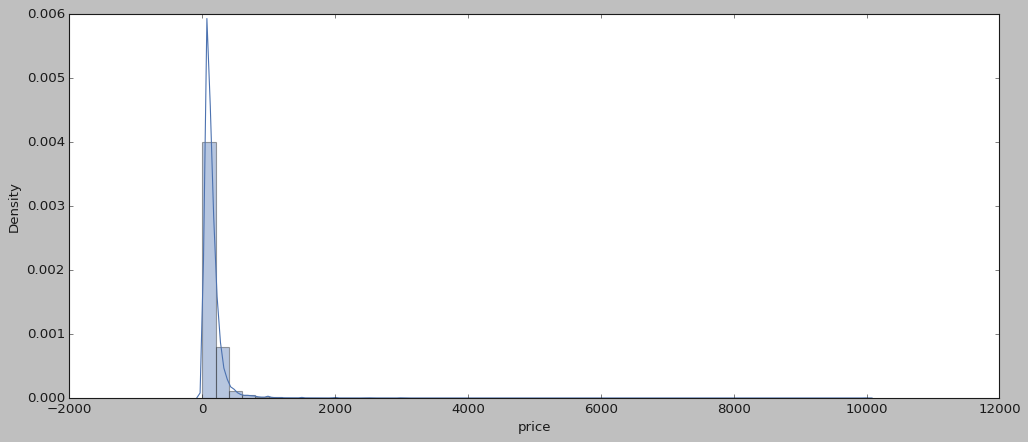

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


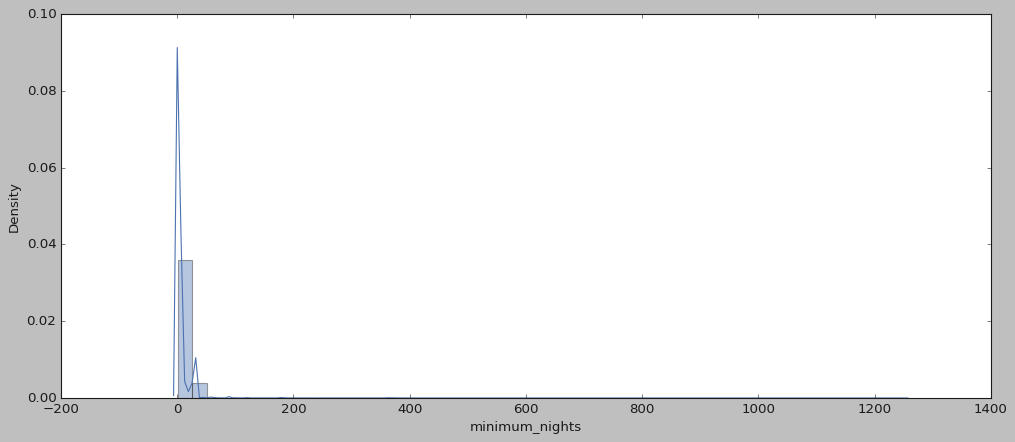

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


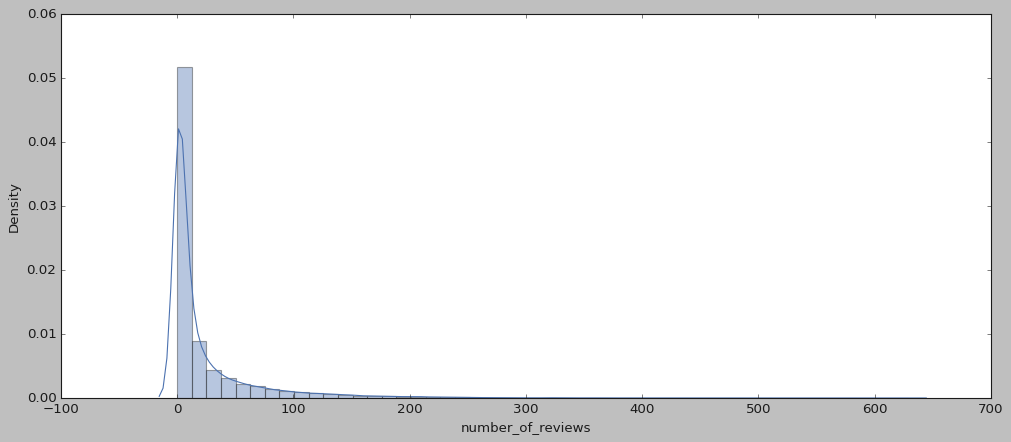

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


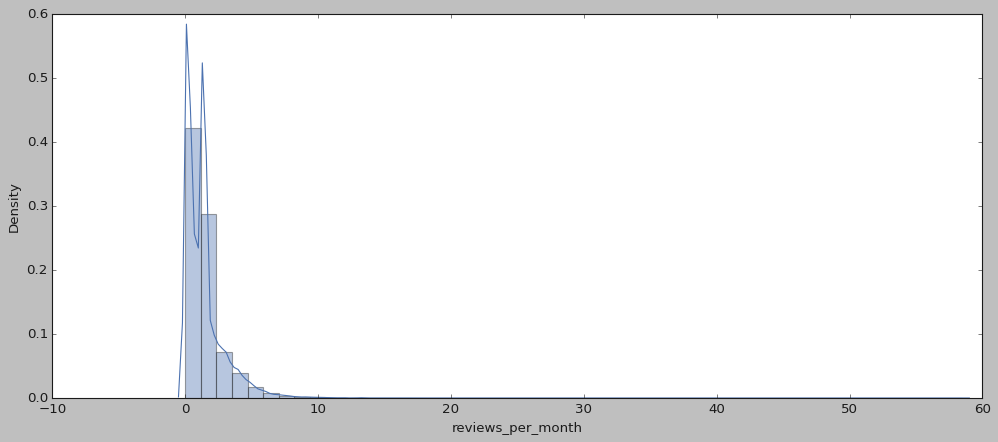

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


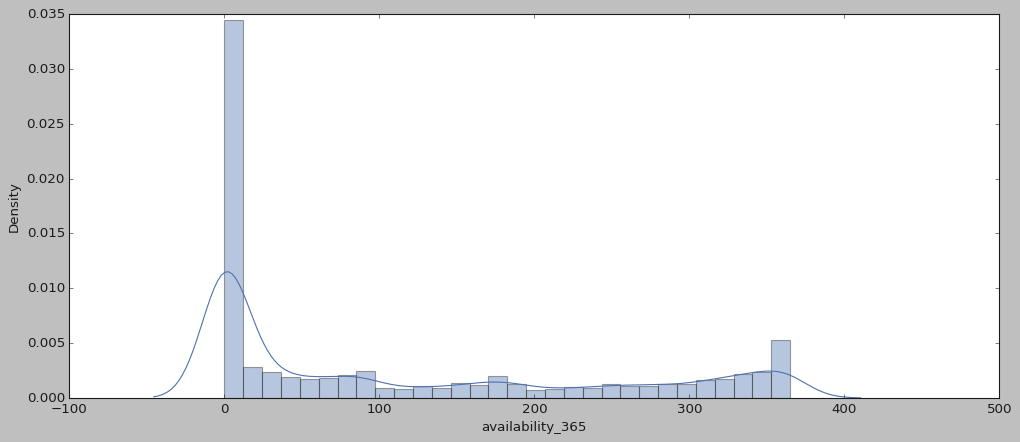

In [107]:
''' visualising distribution of price, minimum nights, number of reviews, 
reviews per month, availability using Distplot'''
variables = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365']
for var in variables:
    plt.figure(figsize=(15,6))
    
    fig = sns.distplot(airbnb_df[var].dropna())
    fig.set_ylabel('Density')
    fig.set_xlabel(var)
  

    plt.show()

* **The above distributions are right skewed due to presence of outliers.**